### Exercise 5

Get the proper libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, show
from matplotlib.ticker import AutoMinorLocator
import matplotlib.ticker
from pandas import read_csv

In [2]:
grav   = 9.81
cp     = 1005.
rd     = 287.05
es0    = 610.78
beta   = 0.067
tmelt = 273.16
eps0   = 0.622
a      = 17.27
b      = 35.86
p      = 1e5

def qsat(p,t):
    es = es0*np.exp(a*(t-tmelt)/(t-b))
    qsat = eps0*es/p
    return qsat

def rlv(t):
    rlv = 3151378 - 2386*t
    return rlv


def cond (t,qt,p):
    beta   = eps0*rlv(t)**2/(rd*cp*t*t)
    qs     = qsat(p,t)*(1+beta*qt)/(1+beta*qsat(p,t))
    ql     = qt - qs
    return ql



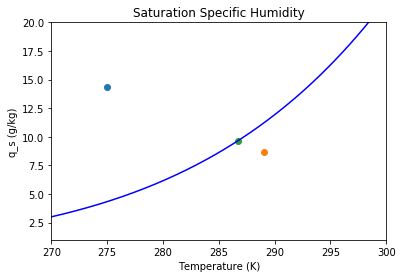

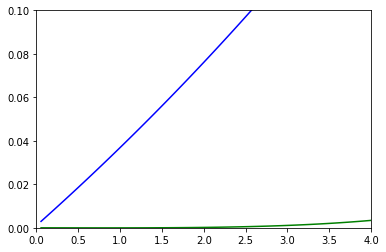

In [17]:
# qt = qsat(p,290)
# qt = np.arange(qsat(p,290), 0.015, 0.00025)

ql1 = np.zeros(100)
ql2 = np.zeros(100)
ql3 = np.zeros(100)

QT= np.zeros(100)
T = 275  # chose at your own will



for i in range(100) :
    QT[i] = qsat(p,T) + (i+1)*1e-4
    ql1[i] = cond(T,QT[i],p)                #      first iteration
    TSTAR = T +rlv(T)/cp * ql1[i]           #      strip off
    QSTAR = QT[i] - ql1[i]                  #      strip off
    ql2[i] = cond(TSTAR,QSTAR,p)            #      second iteration
    TSTAR1 = TSTAR +rlv(T)/cp * ql2[i]      #      strip off
    QSTAR1 = QSTAR - ql2[i]                 #      strip off
    ql3[i] = cond(TSTAR1,QSTAR1,p)          #      third iteration 

#    print(ql1[i]*1000,ql2[i]*1000, ql3[i]*1000 )


ql = ql1 + ql2 + ql3  # benchmark




plt.plot(t,qsat(p,t)*1000,'b')

plt.scatter(T,QT[i]*1000)

plt.scatter(TSTAR,QSTAR*1000)

plt.scatter(TSTAR1,QSTAR1*1000)

plt.xlim   (270,300)                                              # set the x-range 
plt.ylim   (1,20)                                               # set the y-range 
plt.title  ('Saturation Specific Humidity')         # title plot
plt.xlabel ('Temperature (K)')                                        # label x-axis
plt.ylabel ('q_s (g/kg)')                                          # label y-axis
plt.savefig('qsat.pdf')                                             # save to pdf
plt.show()
          
          
plt.xlim   (0,4)                                              # set the x-range 
plt.ylim   (0,0.1)                                               # set the y-range 

 
plt.plot(ql*1000,(ql1-ql)/ql,'b')       # relative error first iteration wrt 3 iterations 

plt.plot(ql*1000,(ql1+ql2-ql)/ql,'g')   # relative error 2nd iteration wrt 3 iterations






         

d. Make a plot of the saturation specific humidity of the atmospheric profile for the lowest 2500 metres in units of g/kg. Include in your plot als the specific humidity qv. Make also a plot of the relative humidity RH = qv/qs for the lowest 2500 metres. (10 points)